In [18]:
from cv2 import imread
import cv2
import imageio
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay, ConvexHull
from sympy.geometry import Triangle


m:  446 
n:  600


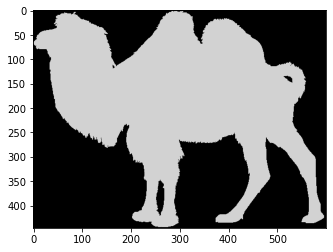

In [2]:
camel = imread('camel.png', cv2.IMREAD_GRAYSCALE)
#camel = camel[:,:,3]
plt.imshow(camel, cmap='gray')
m,n = camel.shape
print('m: ', m, '\nn: ', n)

In [3]:
pts = np.where(camel)
pts = np.array(pts).T

indices = np.arange(len(pts))
np.random.shuffle(indices)

pts = pts[indices]
pts = np.fliplr(pts)
pts[:,1] = m - pts[:,1]

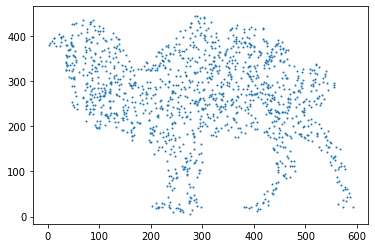

In [4]:
density = 0.01
nb_points = int(len(pts)*density)

points = pts[:nb_points]
plt.scatter(*zip(*points), s=1)

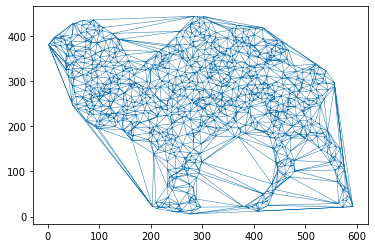

In [5]:
tri = Delaunay(points)

plt.triplot(points[:,0], points[:,1], tri.simplices, lw=.5)

In [6]:
radius = []

for t in tri.simplices:
    tt = Triangle(points[t[0], :], points[t[1],:], points[t[2],:])
    radius.append(tt.circumradius)

In [24]:
r = np.array(radius) < 20
chull =  ConvexHull(tri.convex_hull)


chull_perimeter = chull.area
chull_area = chull.volume

print('Convex Hull:\n\nperimeter: ', chull_perimeter, '\narea: ', chull_area)

Convex Hull:

perimeter:  4262.029537864914 
area:  1169308.5


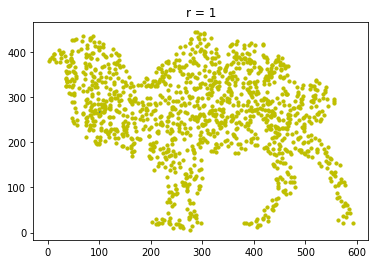

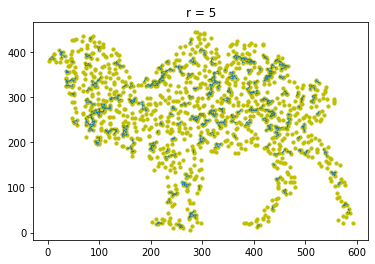

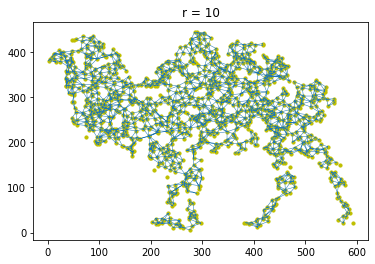

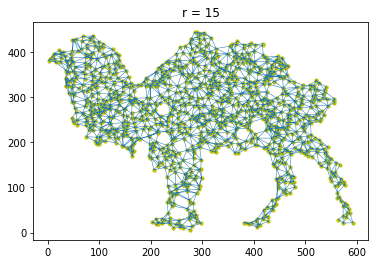

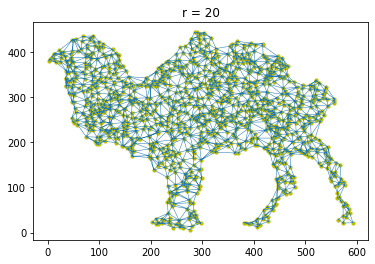

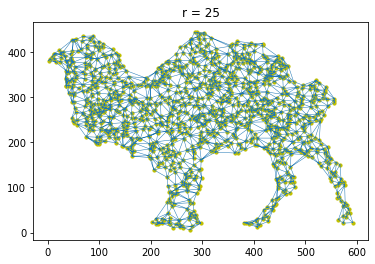

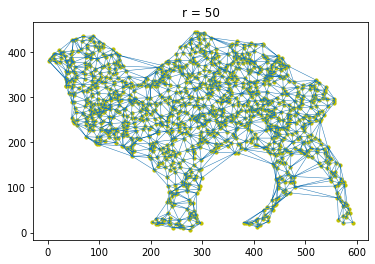

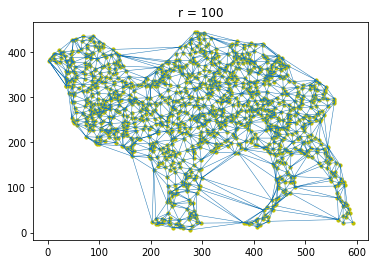

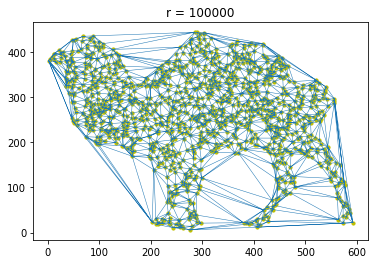

In [10]:
R = [1, 5, 10, 15, 20, 25, 50, 100, 100000]

for r in R:
    rad = r
    r = np.array(radius) < r
    plt.figure()
    plt.triplot(points[:,0], points[:,1], tri.simplices[r], lw=0.5)
    plt.scatter(points[:,0], points[:,1], c='y', s=10)
    plt.title('r = '+str(rad))